# Text Preprocessing | NLP 1
> In this tutorial, I tried to demonstrate the basic concepts of `preprocessing` for natural text starting from `stopwords removal`, `lowering`, and `lemmetization`. 

- toc:true
- branch: master
- badges: true
- comments: true
- author: Ahmed Abulkhair
- categories: [Machine Learning, NLP, NLTK]
- image: images/nlp1.png

# Introduction
When dealing with text data with Machine Learning models. There's a huge and simple problem! Which is, 
#### _Algorithms can not comprehend text, only numbers!_

So, is it all about converting text into numbers? Of course, not! The natural language is a very senstive and expressive type of data which means alot of expressions and desires can be hidden in a piece of text an numbers are less likely to demonestrate that! Numbers can reveal very little information when comparing to the natural text. so, it this set of tutorials, we will try to handle most of the `preprocessing` techniques. Strating from the very basic (like what we will do in this tutorial) ending up with very complex.

## Setup

We will be using the [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html) package and [SpaCy](https://spacy.io/), open-source Python libraries for natural language processing. NLTK has modules for collecting, handling, and processing Twitter data.

For this tutorial, we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly. Let us import them now as well as a few other libraries we will be using.

In [1]:
import nltk                                # Python library for NLP
import spacy                               # Python libray for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns                      # library for visualization
import random                              # pseudo-random number generator

## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial. 

You can download the dataset in your workspace by doing:

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


Now, lets construct a `pie chart` to point out class distrbution.

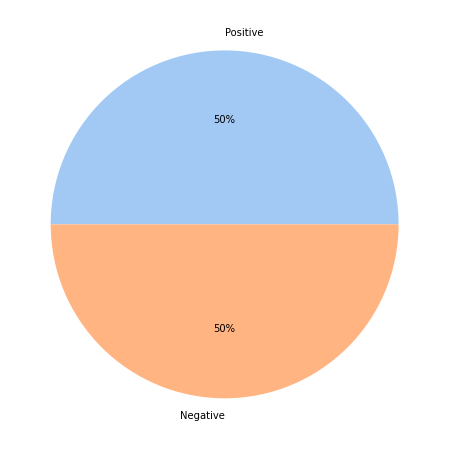

In [5]:
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.pie([len(all_positive_tweets), len(all_negative_tweets)], labels = ['Positive', 'Negative'], colors = colors, autopct='%.0f%%')
plt.show()


## Looking at raw texts

Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two. (Warning: This is taken from a public dataset of real tweets and a very small portion has explicit content.)

In [6]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@PuppyShogun mistakes happen man, as long as we get to play the game, we'll be happy :)
＠maverickgamer_　July 24, 2015 at 07:17PM 　:(


One observation, is the presence of emoticons and URLs in many of the tweets. This info will come in handy in the next steps.

## Steps of Preprocessing

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Removing unnesseary parts (mentions, tags, hashtags, and URLs)
* Lowercasing
* Removing stop words and punctuation
* Tokenizing the string
* Stemming and/or lemmetization

Besides, the first purpose of preprocessing which is `converting text into numbers`, there's one more important purpose, which is about reducing the redundency of the data size itself. In other words, we want to represent the text features in the most minimal feature space and this will be demonestrated clearly for each step. 


Let's import some libraries to help us out!

In [7]:
import re                                  # library for regular expression operations
import string                              # for string operations
import spacy                               # Text processing

In [8]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


### Removing unnesseary parts (mentions, tags, hashtags, and URLs)

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [9]:
# remove old style retweet text "RT"
RT_remover = lambda x : re.sub(r'^b\s([RT]+)?','', x)
# remove all URLs
URL_remover = lambda x: re.sub(r'http\S+', '', x)
# remove hashtags
# only removing the hash # sign from the word
Hashtag_remover = lambda x: re.sub(r'#', '', x)

# Apply all functions
tweet = RT_remover(tweet)
tweet = URL_remover(tweet)
tweet = Hashtag_remover(tweet)


# print final output
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


If you need any further info about using and testing regex, you may visit this [website](https://regex101.com/)

### Lowercasing

This step is often done for the sake of `reducing the feature representation space`. 

For example:
    
* I love cars! Cars are the most passionate hoppy in the world.

> Without `lowercasing`, `cars` and `Cars` with be two different words with two different representation which is not true nor optimal for sure. 

In [10]:
# Lowercasing function
lowercase = lambda x : x.lower()
# Apply function
tweet = lowercase(tweet)
# Print result
print(tweet)

my beautiful sunflowers on a sunny friday morning off :) sunflowers favourites happy friday off… 


### Tokenization

Although this word seems to be complex but it means a very simple process which is `dividing the natural text into parts`! This will make the process of generating a feature representation much easier.

Here, we will divide our natural text into words which are the basic building block of a text. We will be doing that using some built-in functions such as `split()` and `strip()`

In [11]:
def tokenize(text) -> str:
    """
    transform text into list of tokens
    - param:
        - text: input text -> str
    - return
        - text_tokens: list of tokens
    """
    text = text.strip()
    text_tokens = text.split()
    return text_tokens

# test the function
tweet_tokens = tokenize(tweet)
tweet_tokens

['my',
 'beautiful',
 'sunflowers',
 'on',
 'a',
 'sunny',
 'friday',
 'morning',
 'off',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 'off…']

### Removing stop words and punctuation

Stop words and punctuation don't give a lot of meaning in most cases. Let's see an example.

`There is a ball on the table. It is huge and colorful!`

Lets remove stop words and punctuation and see if we can capture the same meaning.

`ball table huge colorful` 

As you can see, it's much shorter and this will defintly lead to lower feature representation. Some packages have provided lists for the stopwords and punctuation in many languges. In this tutorial, we will be using [SpaCy](https://spacy.io/) and `String` packages. 

In [12]:
# Load the core utils for english languge
en = spacy.load('en_core_web_sm')
# Donwload Stopwords
stopwords = en.Defaults.stop_words
# Convert to list
lst_stopwords = list(stopwords)


print('Stop words\n')
print(lst_stopwords)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['‘s', 'even', 'everything', 'how', 'thereafter', 'being', 'mine', 'up', 'make', 'really', '’d', 'own', 'becoming', 'none', 'but', 'between', 'down', '’s', 'whoever', 'been', 'every', 'else', '’m', 'unless', 'serious', 'ever', 'those', 'above', 'wherever', 'cannot', 'any', 'back', 'here', 'whom', 'to', 'well', 'fifteen', 'each', 'due', 'eight', 'whenever', 'often', 'last', 'both', 'ca', 'throughout', 'go', 'mostly', 'three', 'before', 'or', 'few', 'for', 'such', '’re', 'would', 'done', 'thru', 'almost', 'eleven', 'other', 'do', 'this', 'hereby', 'along', 'n‘t', "'d", 'next', 'one', 'seeming', 'were', 'then', 'yourself', 'part', 'wherein', 'while', 'anywhere', 'twenty', 'her', 'beforehand', 'put', 'somehow', 'off', 'either', 'very', 'us', 'perhaps', 'over', 'various', 'no', 'also', 'thus', 'via', 'ours', "'ll", 'someone', 'onto', 'ten', 'just', 'further', 'had', 'within', 'a', 'nine', 'him', 'his', 'never', 'third', 'full', 'nothing', 'hundred', 'there', 'hers', 'around', 'i

In [13]:
tweets_clean = list()
# clean all word tokens
for wrd in tweet_tokens:                   # Iterate over all words
    if (wrd not in lst_stopwords and
        wrd not in set(string.punctuation)):
        tweets_clean.append(wrd)           # Add to clean tweets list

tweets_clean

['beautiful',
 'sunflowers',
 'sunny',
 'friday',
 'morning',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 'off…']

### Stemming and/or lemmetization

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
 Lemmetization is the process of coverting a word into the least meaningfull part of it. Unlike stemming, lemmetization has to produce the least correct root with correct spelling. 
 
 | Word | Lemma | 
| :- | -: |
| **happiness** | **happiness** | 
| **happier** | **happy** | 
| **happier** | **happy** | 


Now, lets see some words that might make you feel the differnce. 

| Word | Stem | Lemma |
| :- | -: | :-: |
| **caring** | **care** | **caring**
| **ties** | **ti** | **tie**
| **easily** | **easili** | **easily**
| **mice** | **mice** | **mouse**


As you can see, stemming can sometimes produce uncorrect words such as `ti` and `easili`. On contrary, the lemmetization always produce a correct word in spelling even if this will lead to higher feature representation. For example, `caring` and `care` will be to different elements in the feature representation, however they share the same root `car` when dealing with stemming instead. We will be using `NLTK` library for that purpose for lemmetizing this data.




In [14]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Intiate WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Lemmetize the words
tweets_lemmas = []
for wrd in tweets_clean:
    wrd = lemmatizer.lemmatize(wrd)
    tweets_lemmas.append(wrd)
    
tweets_lemmas

['beautiful',
 'sunflower',
 'sunny',
 'friday',
 'morning',
 ':)',
 'sunflower',
 'favourite',
 'happy',
 'friday',
 'off…']

### Putting it all together. 
By now, we have completed all the required preprocessing steps. Lets combine them all in a one preprocess function that will be used in our next tutorial. 

In [15]:
def preprocess(txt) -> str:
    
    # remove old style retweet text "RT"
    RT_remover = lambda x : re.sub(r'^b\s([RT]+)?','', x)
    # remove all URLs
    URL_remover = lambda x: re.sub(r'http\S+', '', x)
    # remove hashtags
    # only removing the hash # sign from the word
    Hashtag_remover = lambda x: re.sub(r'#', '', x)

    # Apply all functions
    txt = RT_remover(txt)
    txt = URL_remover(txt)
    txt = Hashtag_remover(txt)
    
    def tokenize(text) -> str:
        """
        transform text into list of tokens
        - param:
            - text: input text -> str
        - return
            - text_tokens: list of tokens
        """
        text = text.strip()
        text_tokens = text.split()
        return text_tokens
    
    lst_txt = tokenize(txt)
    
    # Import modules
    import string
    import spacy
    from nltk.stem import WordNetLemmatizer
    # Load the core utils for english languge
    en = spacy.load('en_core_web_sm')
    # Donwload Stopwords
    stopwords = en.Defaults.stop_words
    # Convert to list
    lst_stopwords = list(stopwords)
    
    lst_txt_clean = list()
    # clean all word tokens
    for wrd in lst_txt:                   # Iterate over all words
        if (wrd not in lst_stopwords and
            wrd not in set(string.punctuation)):
            lst_txt_clean.append(wrd)           # Add to clean tweets list

    lemmatizer = WordNetLemmatizer()
    # Lemmetize the words
    lst_txt_lemmas = []
    for wrd in lst_txt_clean:
        wrd = lemmatizer.lemmatize(wrd)
        lst_txt_lemmas.append(wrd)
        
        
    return lst_txt_lemmas

    
    

Let's test it!

In [16]:
sample_tweet = all_positive_tweets[random.randint(0,5000)]
preprocess(sample_tweet)

['Well', 'morning', 'carry', 'great.', 'Work', ':)']

That is the end of this tutorial! If you find this beneficial. Follow me for more updates!

* [LinkedIn](https://www.linkedin.com/in/aaabulkhair/)
* [Kaggle](https://www.kaggle.com/ahmedabdulhamid)
